# Titanic Dataset

#### Date set: Titanic
#### Source: [Kaggle](https://www.kaggle.com/c/titanic). 
#### The data contains the following fields:

"The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy."

The data has been split into two groups:
* Training set
* Test set

 The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

The data includes:

1. survival: Survival (0 = No, 1 = Yes)

2. pclass: Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)

3. sex: Sex 	

4. Age: Age in years 	

5. sibsp: # of siblings/spouses aboard the Titanic 

6. parch: # of parents/children aboard the Titanic

7. ticket: Ticket number 	

8. fare: Passenger fare 	

9. cabin: Cabin number 	

10. embarked: Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

Variable Notes:

1. pclass: A proxy for socio-economic status (SES)
2. 1st = Upper
3. 2nd = Middle
4. 3rd = Lower
5. age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5
6. sibsp: The dataset defines family relations in this way...
7. Sibling = brother, sister, stepbrother, stepsister
8. Spouse = husband, wife (mistresses and fiancés were ignored)
9. parch: The dataset defines family relations in this way...
10. Parent = mother, father
11. Child = daughter, son, stepdaughter, stepson
12. Some children travelled only with a nanny, therefore parch=0 for them.

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [229]:
train = pd.read_csv('titanic_train.csv')

In [230]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Exploratory Data Analysis

Let's begin some exploratory data analysis! We'll start by checking out missing data!

## Missing Data

We can use seaborn to create a simple heatmap to see where we are missing data!

In [205]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [206]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


#### Missing data

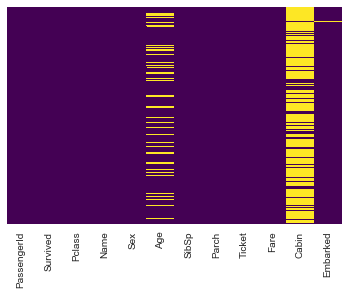

In [151]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis');

In [152]:
len(train[train['Age'].isnull()])

177

Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. We'll probably drop this later, or change it to another feature like "Cabin Known: 1 or 0"

Let's continue on by visualizing some more of the data! Check out the video for full explanations over these plots, this code is just to serve as reference.

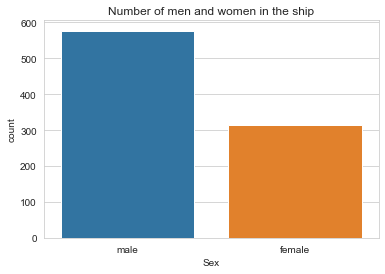

In [153]:
sns.countplot(x='Sex',data=train);
plt.title('Number of men and women in the ship');

Number of men present in the ship is nearly two times the number of women.

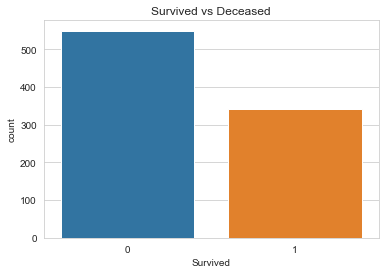

In [154]:
sns.countplot(x='Survived',data=train);
plt.title('Survived vs Deceased');

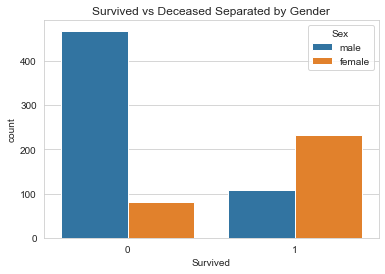

In [155]:
sns.countplot(x='Survived',hue='Sex',data=train);
plt.title('Survived vs Deceased Separated by Gender');

It seems that most of the passengers who are survived are women. That makes sense because women and children were priority when abandoning the ship.

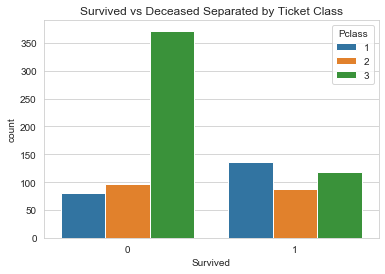

In [156]:
sns.countplot(x='Survived',hue='Pclass',data=train);
plt.title('Survived vs Deceased Separated by Ticket Class');

Majority of the passengers who lost their lives where from class 3. But we should look to see what was the proportional number of passengers i each class and their relative survival rate.

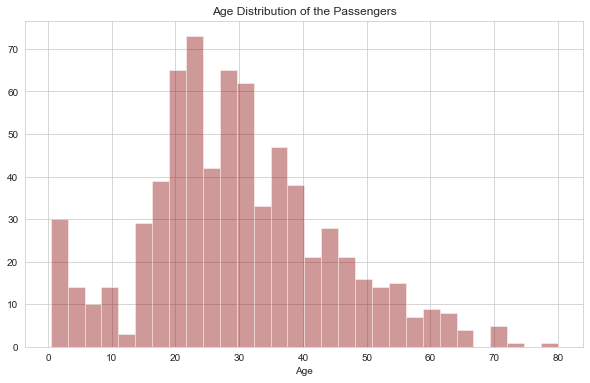

In [157]:
plt.figure(figsize=(10,6))
sns.distplot(train['Age'].dropna(),kde=False,color='darkred',bins=30);
plt.title('Age Distribution of the Passengers');

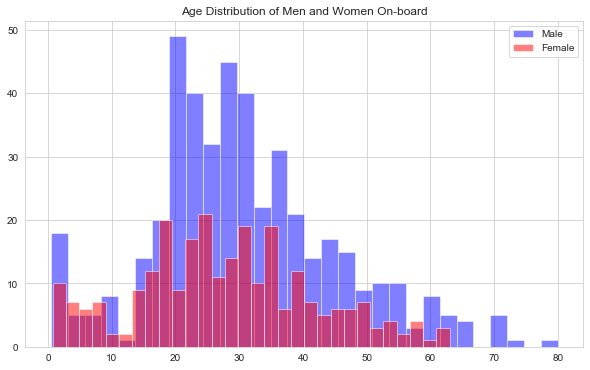

In [158]:
plt.figure(figsize=(10,6))
train[train['Sex']=='male']['Age'].hist(alpha=0.5,color='blue',bins=30,label='Male');
train[train['Sex']=='female']['Age'].hist(alpha=0.5,color='red',bins=30,label='Female');
plt.legend();
plt.title('Age Distribution of Men and Women On-board');

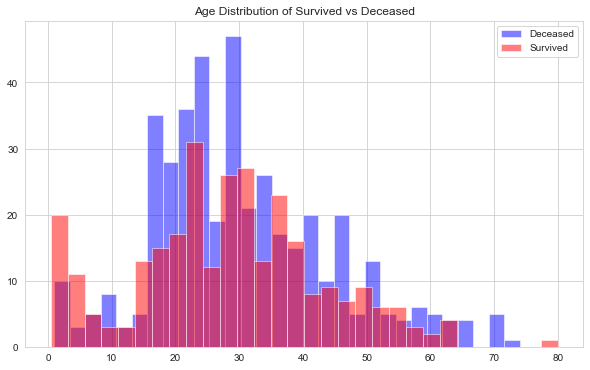

In [159]:
plt.figure(figsize=(10,6))
train[train['Survived']==0]['Age'].hist(alpha=0.5,color='blue',bins=30,label='Deceased');
train[train['Survived']==1]['Age'].hist(alpha=0.5,color='red',bins=30,label='Survived');
plt.legend();
plt.title('Age Distribution of Survived vs Deceased');

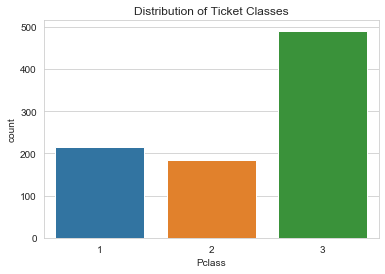

In [160]:
sns.countplot(x='Pclass',data=train);
plt.title('Distribution of Ticket Classes');

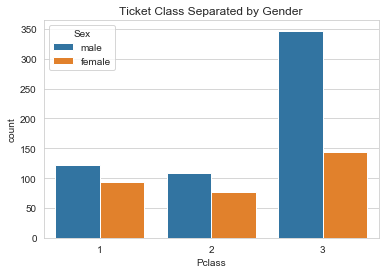

In [161]:
sns.countplot(x='Pclass',hue='Sex',data=train);
plt.title('Ticket Class Separated by Gender');

In [232]:
# Converting the Sibsp and Parch to categorical columns

def MakeCategorical(x):
    if x>0:
        return 1
    else:
        return 0

    
train['SibSp_Cat'] = train['SibSp'].apply(MakeCategorical)
train['Parch_Cat'] = train['Parch'].apply(MakeCategorical)

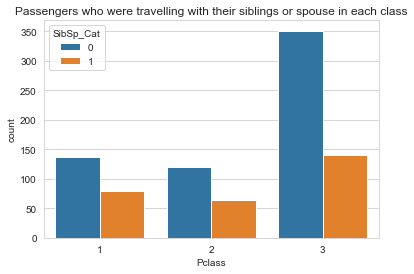

In [163]:
sns.countplot(x='Pclass',hue='SibSp_Cat',data=train);
plt.title('Passengers who were travelling with their siblings or spouse in each class');

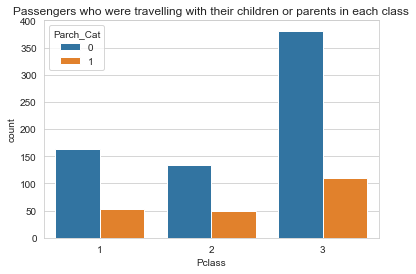

In [164]:
sns.countplot(x='Pclass',hue='Parch_Cat',data=train);
plt.title('Passengers who were travelling with their children or parents in each class');

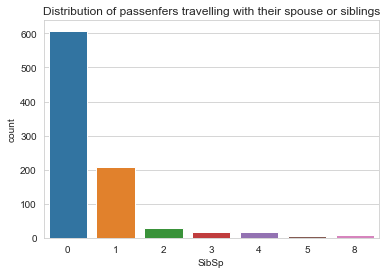

In [165]:
sns.countplot(x='SibSp',data=train);
plt.title('Distribution of passenfers travelling with their spouse or siblings');

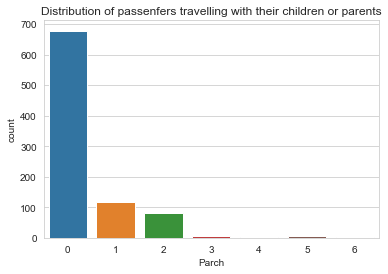

In [166]:
sns.countplot(x='Parch',data=train);
plt.title('Distribution of passenfers travelling with their children or parents');

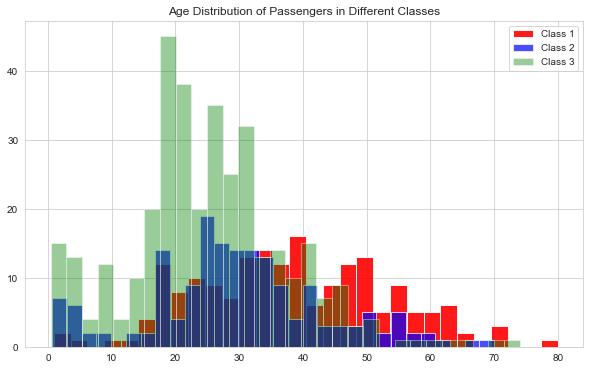

In [167]:
plt.figure(figsize=(10,6))
train[train['Pclass']==1]['Age'].hist(alpha=0.9,color='red',bins=30,label='Class 1');
train[train['Pclass']==2]['Age'].hist(alpha=0.7,color='blue',bins=30,label='Class 2');
train[train['Pclass']==3]['Age'].hist(alpha=0.4,color='green',bins=30,label='Class 3');
plt.legend();
plt.title('Age Distribution of Passengers in Different Classes');

Majority of Class 3 are below 50 yrs old, while Class 1 has more older people in it. Again, it makes sense, because it is more probable that an older person to be richer so they can afford a better ticket.

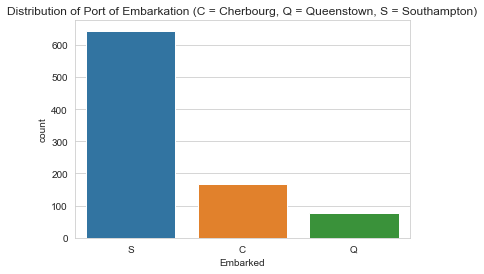

In [168]:
sns.countplot(x='Embarked',data=train);
plt.title('Distribution of Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)');

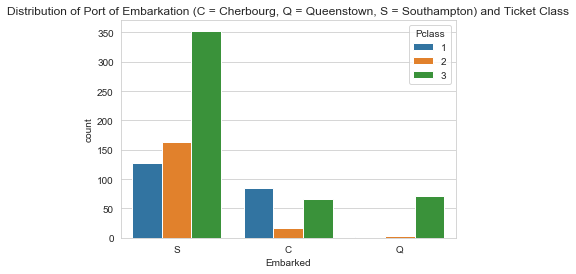

In [169]:
sns.countplot(x='Embarked',hue='Pclass',data=train);
plt.title('Distribution of Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton) and Ticket Class');

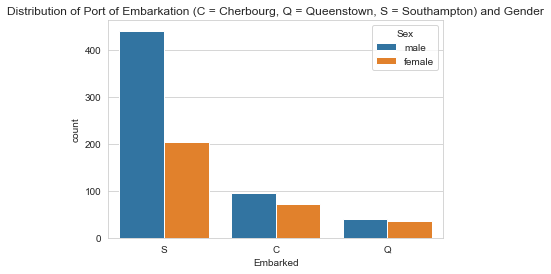

In [170]:
sns.countplot(x='Embarked',hue='Sex',data=train);
plt.title('Distribution of Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton) and Gender');

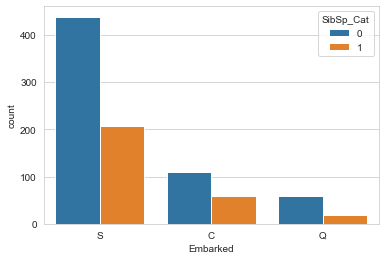

In [171]:
sns.countplot(x='Embarked',hue='SibSp_Cat',data=train);
#plt.title('Distribution of Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)');

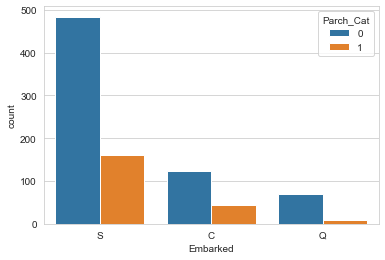

In [172]:
sns.countplot(x='Embarked',hue='Parch_Cat',data=train);

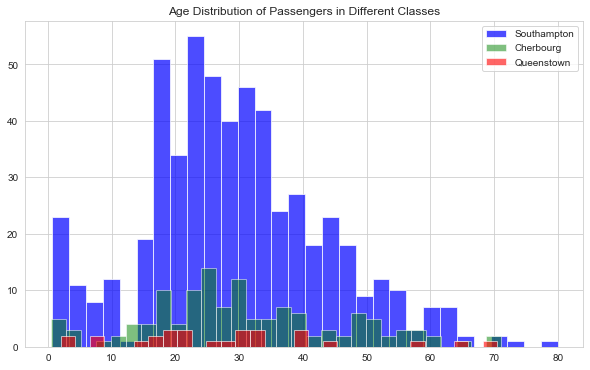

In [173]:
plt.figure(figsize=(10,6))
train[train['Embarked']=='S']['Age'].hist(alpha=0.7,color='blue',bins=30,label='Southampton');
train[train['Embarked']=='C']['Age'].hist(alpha=0.5,color='green',bins=30,label='Cherbourg');
train[train['Embarked']=='Q']['Age'].hist(alpha=0.6,color='red',bins=30,label='Queenstown');
plt.legend();
plt.title('Age Distribution of Passengers in Different Classes');

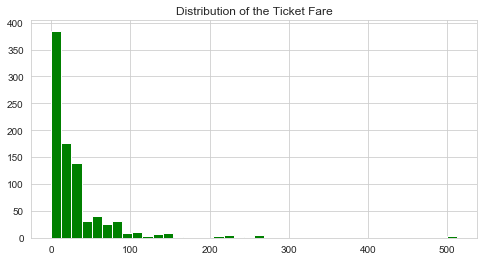

In [174]:
train['Fare'].hist(color='green',bins=40,figsize=(8,4));
plt.title('Distribution of the Ticket Fare');

There is one very expensive ticket!!!! Let's see who that person is:

In [175]:
print(train['Fare'].max())
print(train['Fare'].argmax())
train.iloc[258]

512.3292
258


C:\Users\Ahmad\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning:


The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.



PassengerId                 259
Survived                      1
Pclass                        1
Name           Ward, Miss. Anna
Sex                      female
Age                          35
SibSp                         0
Parch                         0
Ticket                 PC 17755
Fare                    512.329
Cabin                       NaN
Embarked                      C
SibSp_Cat                     0
Parch_Cat                     0
Name: 258, dtype: object

Annie was working for the wealthy Cardeza family as the personal maid to wealthy widow Charlotte Drake Cardeza.

In [176]:
train[train['Name'].str.contains('Cardeza')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SibSp_Cat,Parch_Cat
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,0,1


In [177]:
train[train['Name'].str.contains('Gustave')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SibSp_Cat,Parch_Cat
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,0,0


Mrs Cardeza's son is Thomas and his manservant Gustave Lesueur. Mrs. Cardeza's name is not in the training dataset.

It is also intersting that some people didn't pay for their tickets. All of them are men and only one survived.

For example, Richard Fry was the valet Mr Joseph Bruce Ismay and William Henry Harrison was Mr. Ismay's secretary. Mr. Ismay was survived.

I could not fine the meaning of LINE as ticket!!!! Are they the Titanic crews?

In [182]:
train[train['Fare']==0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SibSp_Cat,Parch_Cat
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S,0,0
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S,0,0
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S,0,0
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S,0,0
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S,0,0
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S,0,0
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S,0,0
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S,0,0
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S,0,0
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S,0,0


### Trying Cufflinks:

In [178]:
import cufflinks as cf
cf.go_offline()

In [179]:
train['Fare'].iplot(kind='hist',bins=30,color='green')

## To do

Grouping by name

Grouping by Ticket Number

In [208]:
train['Ticket'].nunique()

681

## Grouping by last name

In [233]:
train['Last_Name'] = train['Name'].apply(lambda x: x.split(',')[0])

In [234]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SibSp_Cat,Parch_Cat,Last_Name
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,Braund
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,Cumings
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,Heikkinen
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,Futrelle
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,Allen


___
## Data Cleaning
We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation).
However we can be smarter about this and check the average age by passenger class. For example:


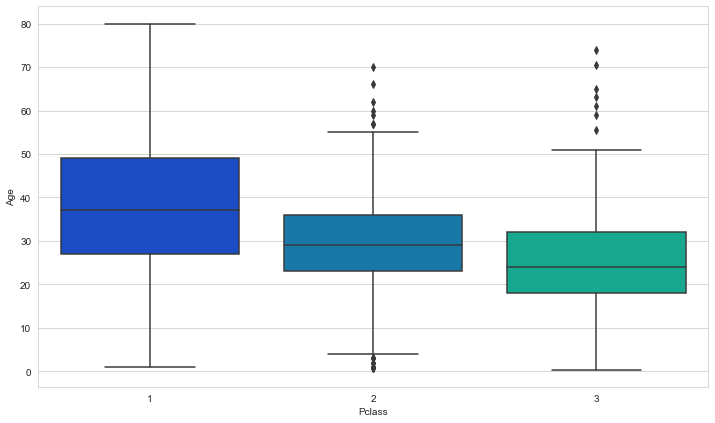

In [235]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter');

As we saw before, the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.

In [236]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return train[train['Pclass']==1]['Age'].median()

        elif Pclass == 2:
            return train[train['Pclass']==2]['Age'].median()

        else:
            return train[train['Pclass']==3]['Age'].median()

    else:
        return Age

In [237]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

Now let's check that heat map again!

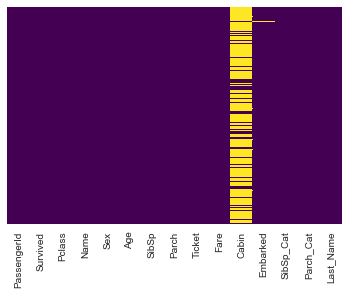

In [238]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis');

Great! Let's go ahead and drop the Cabin column and the row in Embarked that is NaN.

Later we can work on the Cabin column as a binary column (It has cabin name or not)

In [239]:
train.drop('Cabin',axis=1,inplace=True)

In [240]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,SibSp_Cat,Parch_Cat,Last_Name
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,Braund
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,0,Cumings
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,Heikkinen
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,0,Futrelle
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,0,Allen


In [241]:
train.dropna(inplace=True)

## Converting Categorical Features 

We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [242]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 14 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
SibSp_Cat      889 non-null int64
Parch_Cat      889 non-null int64
Last_Name      889 non-null object
dtypes: float64(2), int64(7), object(5)
memory usage: 104.2+ KB


In [243]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [244]:
train.drop(['Sex','Embarked','Name','Ticket','Last_Name','SibSp_Cat','Parch_Cat'],axis=1,inplace=True)

In [245]:
train = pd.concat([train,sex,embark],axis=1)

In [246]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


Great! Our data is ready for our model!

# Building a Logistic Regression model

Let's start by splitting our data into a training set and test set (there is another test.csv file that you can play around with in case you want to use all this data for training).

## Train Test Split

In [247]:
from sklearn.model_selection import train_test_split

In [249]:
X = train.drop('Survived',axis=1)
y = train['Survived']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30,random_state=101)

## Training and Predicting

In [250]:
from sklearn.linear_model import LogisticRegression

In [251]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\Ahmad\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [252]:
predictions = logmodel.predict(X_test)

Let's move on to evaluate our model!

## Evaluation

We can check precision,recall,f1-score using classification report!

In [253]:
from sklearn.metrics import classification_report,confusion_matrix

In [254]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.93      0.86       163
           1       0.85      0.65      0.74       104

    accuracy                           0.82       267
   macro avg       0.83      0.79      0.80       267
weighted avg       0.82      0.82      0.81       267



In [255]:
print(confusion_matrix(y_test,predictions))

[[151  12]
 [ 36  68]]


Not so bad! We need to explore other feature engineering:

* Try grabbing the Title (Dr.,Mr.,Mrs,etc..) from the name as a feature
* Maybe the Cabin letter could be a feature
* Is there any info you can get from the ticket?

# More work should be done to improve the model